# Imports

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

# Load Data

In [2]:
appl = yf.Ticker("AAPL")

In [3]:
appl_hist = appl.history(period="max")

# make pandas dataframe
apple_df = pd.DataFrame(appl_hist)

# Create Features

## Simple Moving Average SMA

In [4]:
def sma(data):
    window = [7, 21, 50]
    for i in window:
        apple_df[f"rolling_mean_{i}"] = apple_df['Close'].rolling(window=i).mean()

In [5]:
sma(apple_df)

In [6]:
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rolling_mean_7,rolling_mean_21,rolling_mean_50
Date,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0,NaN,NaN,NaN
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0,NaN,NaN,NaN
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0,NaN,NaN,NaN
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,175.570007,177.710007,173.520004,173.720001,75604200,0.0,0.0,172.454285,176.629524,183.006848
2024-03-19 00:00:00-04:00,174.339996,176.610001,173.029999,176.080002,55215200,0.0,0.0,173.218571,176.332857,182.909467
2024-03-20 00:00:00-04:00,175.720001,178.669998,175.089996,178.669998,53423100,0.0,0.0,174.064285,176.195238,182.776396


# Feature Selection

# Labeling

In [7]:
# Function to lable the data
# if i + 11 is the max value in the window, label as BUY
# if i + 11 is the min value in the window, label as SELL
# else label as HOLD
# Idea: Buy when the stock is at its lowest in the window, sell when it is at its highest

# Source: https://medium.com/@quantclubiitkgp/stock-buy-sell-hold-prediction-using-cnn-ee7b671f4ad3

def get_labels(df, windowSize=11):
   labels = [] 
   values = []
   for i in range(len(df.Close) - windowSize): 
      mx = df.Close.iloc[i]
      mn = df.Close.iloc[i]
      mxIndex, mnIndex = i, i
      for j in range(i + 1, i + windowSize + 1): 
         if df.Close.iloc[j] > mx:
               mx = df.Close.iloc[j]
               mxIndex = j
         if df.Close.iloc[j] < mn: 
               mn = df.Close.iloc[j] 
               mnIndex = j

      if mnIndex == i + 11:
         labels.append('SELL')
         values.append(i + 11)
      elif mxIndex == i + 11:
         labels.append('BUY')
         values.append(i + 11)
      else:
         labels.append('HOLD')
         values.append(i + 11)
   
   # Append 11 times a 999 to the end of the labels list
   for i in range(11):
      labels.append(999)

   # Append the labels to the dataframe from the start
   df['Labels'] = labels

   # Replace the 999 with NaN
   df['Labels'] = df['Labels'].replace(999, np.nan)

   print('Labeling done!')

   return df


In [8]:
apple_df = get_labels(apple_df)


Labeling done!


In [9]:
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rolling_mean_7,rolling_mean_21,rolling_mean_50,Labels
Date,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0,NaN,NaN,NaN,HOLD
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0,NaN,NaN,NaN,HOLD
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0,NaN,NaN,NaN,HOLD
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0,NaN,NaN,NaN,HOLD
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0,NaN,NaN,NaN,HOLD
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,175.570007,177.710007,173.520004,173.720001,75604200,0.0,0.0,172.454285,176.629524,183.006848,NaN
2024-03-19 00:00:00-04:00,174.339996,176.610001,173.029999,176.080002,55215200,0.0,0.0,173.218571,176.332857,182.909467,NaN
2024-03-20 00:00:00-04:00,175.720001,178.669998,175.089996,178.669998,53423100,0.0,0.0,174.064285,176.195238,182.776396,NaN


<Axes: >

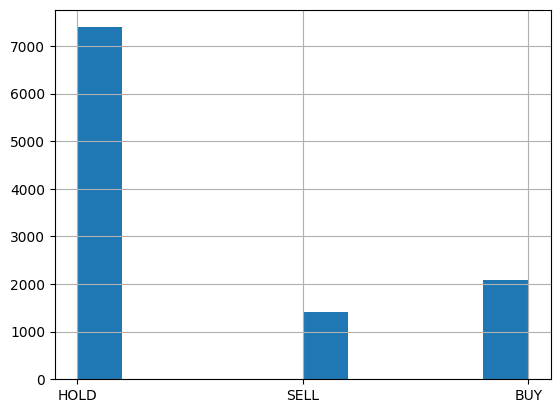

In [10]:
# plot a histogramm of the labels
apple_df['Labels'].hist()
